# Nội dung 1: Làm quen với dữ liệu và Matplotlib
### Nhiệm vụ : 
><b>a. Tải tập dữ liệu và sử dụng pandas đọc dữ liệu </b>

><b>b. Phân tích cơ bản dùng Info() và Describe() để hiểu cấu trúc và các đặc điểm của dữ liệu</b>

> <b>c. Sử dụng Matplotlib để vẽ:</b>
>> - *Một biểu đồ cột (bar plot) thể hiện số lượng nhân viên theo mức lương (salary).*
>> - *Một biêu đồ phân tán (scatter plot) giữa satisfaction_level và last_evaluation, với màu sắc khác nhau cho nhân viên đã nghỉ việc (left = 1) à chưa nghỉ việc (left = 0).*


In [60]:
import pyspark
from pyspark.sql import SparkSession
import findspark
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
findspark.init
spark = SparkSession.builder.appName('mid-term').getOrCreate()
df_midterm = spark.read.csv(r'HR_comma_sep.csv',header= True, inferSchema=True)
df_pandas = df_midterm.toPandas()
print(df_pandas)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

+ <blackquote> <b> b. Phân tích cơ bản dùng Info() và Describe() để hiểu cấu trúc và các đặc điểm của dữ liệu

In [61]:
df_midterm.describe().show()
df_pandas.info()


+-------+-------------------+-------------------+------------------+--------------------+------------------+-------------------+-------------------+---------------------+---------+------+
|summary| satisfaction_level|    last_evaluation|    number_project|average_montly_hours|time_spend_company|      Work_accident|               left|promotion_last_5years|    sales|salary|
+-------+-------------------+-------------------+------------------+--------------------+------------------+-------------------+-------------------+---------------------+---------+------+
|  count|              14999|              14999|             14999|               14999|             14999|              14999|              14999|                14999|    14999| 14999|
|   mean| 0.6128335222348166| 0.7161017401159978|  3.80305353690246|   201.0503366891126| 3.498233215547703| 0.1446096406427095| 0.2380825388359224| 0.021268084538969265|     NULL|  NULL|
| stddev|0.24863065106114257|0.17116911062327556|1.232592355

><b>c. Sử dụng Matplotlib để vẽ:</b>
>>- *Một biểu đồ cột (bar plot) thể hiện số lượng nhân viên theo mức lương (salary).*
>>- *Một biêu đồ phân tán (scatter plot) giữa satisfaction_level và last_evaluation, với màu sắc khác nhau cho nhân viên đã nghỉ việc (left = 1) à chưa nghỉ việc (left = 0).*


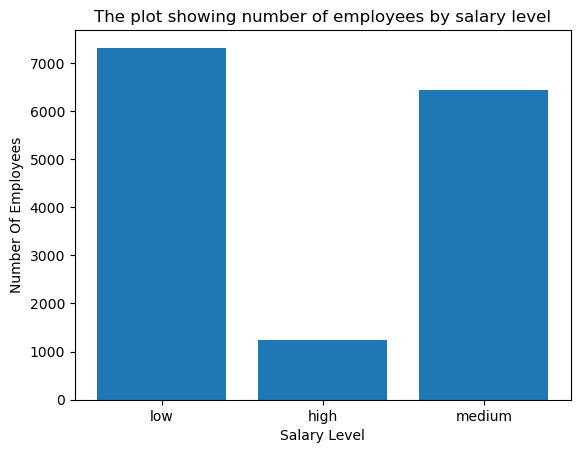

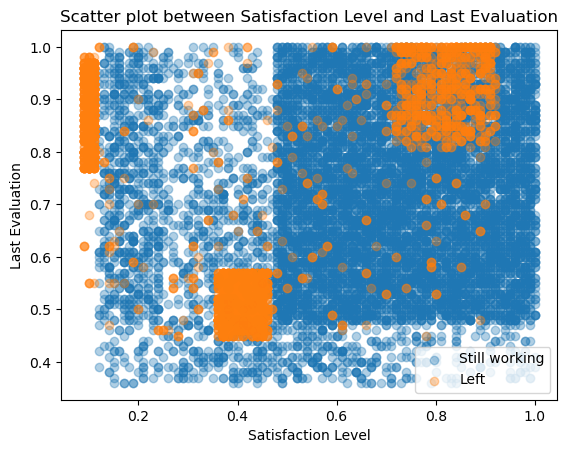

In [62]:
##=======================================================MATPLOTLIB===================================================================##

##==========================================================================================================================##

## Bar plot using Matplotlib to show the number of employees by salary
salary_bar = df_midterm.groupBy('salary').count().toPandas()
plt.xlabel('Salary Level')
plt.ylabel('Number Of Employees')
plt.title('The plot showing number of employees by salary level')
plt.bar(salary_bar['salary'],salary_bar['count'], data=salary_bar)
plt.show()

##==========================================================================================================================##

## Scatter Plot using Matplotlib to display a relationship bewteen 'Satisfaction' and 'Last evaluation' with different color by Left column value 
left = df_pandas[df_pandas['left'] == 1]
still = df_pandas[df_pandas['left'] == 0]
plt.scatter(x = still['satisfaction_level'],
            y= still['last_evaluation'], 
            label = 'Still working', 
            alpha= 0.35)


plt.scatter(x = left['satisfaction_level'],
            y= left['last_evaluation'], 
            label = 'Left', 
            alpha= 0.35)

plt.legend()
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title("Scatter plot between Satisfaction Level and Last Evaluation")
plt.show()


# Nội dung 2: Trực quan hóa nâng cao với Seaborn
### Nhiệm vụ:
><b> a. Sử dụng Seaborn để vẽ:</b>
>> - *Một Implot giữa satisfaction_level và last_evaluation với hue='left' (xem trang 151-153). Một boxplot so sánh phân phối satisfaction_level theo mức lương (salary) (xem trang 156-157).*
>> - *Một countplot thể hiện số lượng nhân viên theo salary, phân loại theo left (xem trang 159-161).*<br>

<b>b. Viết nhận xét ngắn về xu hướng hoặc mối quan hệ mà bạn nhận thấy từ các biểu đồ.</b>

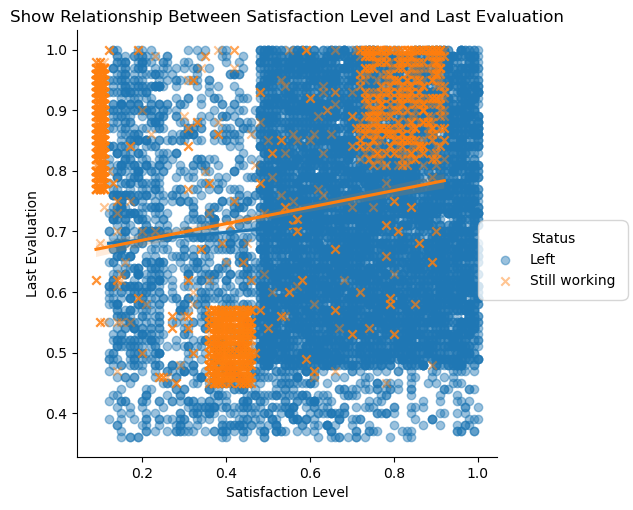

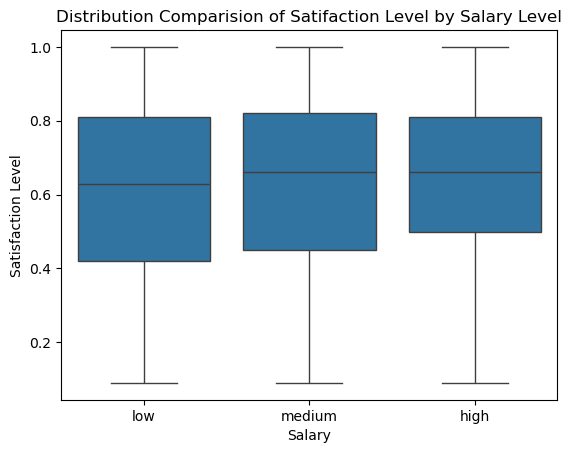

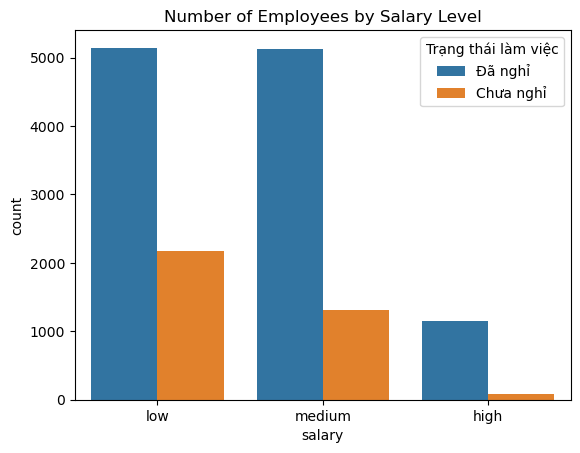

In [63]:
##=======================================================SEABORN================================================================##

##==========================================================================================================================##

#Import seaborn Libary
import seaborn as sns

#LMPLOT using Seaborn to show relationship between Satisfaction Level and Last Evaluation with Hue = 'Left'

sns_lmplot = sns.lmplot(x = 'satisfaction_level',
           y = 'last_evaluation',
           data = df_pandas,
           hue = 'left',
           markers= ['o','x'],
           facet_kws={'legend_out': True},
           scatter_kws={'alpha': 0.45})
plt.title('Show Relationship Between Satisfaction Level and Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
#Change a Title of Legend()
lmplot_titlte = 'Status'

#Set new title for Legend()
sns_lmplot._legend.set_title(lmplot_titlte)

#Create new values of labels
lmplot_labels = ['Left', 'Still working']

#Change values in the legend to suitable labels -> Left = 0 is 'Still Working' and Left = 1 is 'Left' 
for t, l in zip(sns_lmplot._legend.texts, lmplot_labels):
    t.set_text(l)

sns_lmplot._legend.set_bbox_to_anchor((1.123, 0.5)) 
sns_lmplot._legend.get_frame().set_visible(True) 
sns_lmplot._legend.get_frame().set_boxstyle("round,pad=0.5")  

plt.show()


##==========================================================================================================================##

#BOXPLOT using Seaborn to compare the distribution of satisfaction level by salary level
sns_boxplot = sns.boxplot(x = 'salary',
            y = 'satisfaction_level',
            data = df_pandas)
plt.xlabel('Salary')
plt.ylabel('Satisfaction Level')
plt.title('Distribution Comparision of Satifaction Level by Salary Level')
plt.show()


##==========================================================================================================================##

#COUNTPLOT using Seaborn to show the number of employees by salary level, categoried by left column
sns_countplot = sns.countplot(x= 'salary',data =df_pandas, hue = 'left')
plt.title('Number of Employees by Salary Level')

handles, labels = sns_countplot.get_legend_handles_labels()
new_labels = ['Đã nghỉ', 'Chưa nghỉ']  #Re-define a label at 'Left' Column
sns_countplot.legend(handles, new_labels, title="Trạng thái làm việc")

plt.show()

### <b>Comment About Tendency or Relationship From Each Plot Above</b>
 > #### LMPLOT'S COMMENT :
- >> *Nhìn chung, đường hồi quy (Regression Line) cho ta thấy rằng có một xu hướng nhẹ khi Satisfaction Level tăng thì cũng có sự gia tăng của Last Evaluation. Tuy nhiên, các mối quan hệ đều phân tán rất lớn thể hiện sự không đồng đều giữa các dữ liệu.*
- >> *Các điểm thể hiện nhân viên đã nghỉ việc (Màu cam, kí hiệu ‘o’) tập trung nhiều ở nửa trên biểu đồ (từ Last Evaluation = 0.7 – 1.0) cho ta thấy cho dù khi Satisfaction Level có cao hay thấp thì việc làm việc quá mức có thể làm nhân viên nghỉ việc. Mặc dù vậy, vẫn có những nhóm nhân viên nghỉ việc tập trung ơ mức Last Evaluation từ 0.6 đến 0.4. Từ đó, ta có thể nhận định rằng công suất hoạt động công việc cao có khả năng dẫn đến việc nhân viên nghỉ việc nhưng cũng có những nhân viên nghỉ việc vì lí do khác.*
- >>*Các điểm thể hiện nhân viên đang làm việc (Màu xanh dương, kí hiêu ‘x’) phân bố rộng ở tất cả các điểm trên biểu đồ, nhưng tập trung nhiều nhất ở mức Satisfaction Level từ trung bình đến cao.*
- >>Kết luận: 
- >>>*Biểu đồ cho thấy mối quan hệ phi tuyến tính giữa mức độ hài lòng, đánh giá lần cuối, và trạng thái công việc của nhân viên.*
- >>>*Nhân viên có mức độ hài lòng thấp thường dễ nghỉ việc, điều này phù hợp với kỳ vọng.*
- >>>*Tuy nhiên, một số nhân viên có mức độ hài lòng cao và được đánh giá tốt cũng rời bỏ tổ chức, cho thấy rằng các yếu tố khác ngoài sự hài lòng và hiệu suất cũng ảnh hưởng đến quyết định nghỉ việc.*


> #### BOX PLOT : 
+ >> *Biểu đồ có thể cho ta thấy dù là Salary từ Low, Medium hay thậm chí là High thì mức trung vị của dữ liệu về Satisfaction Level đều nằm từ khoảng 0.6 đến 0.7, qua đó cho thấy rằng dù là ở mức lương nào thì độ hài lòng vẫn rất tốt. Tuy nhiên, các mức lương khác nhau cũng có sự phân bố khác nhau.*
+ >>*Mức lương thấp có độ phân bố rất cao, với độ hài lòng phân bố từ rất thấp (~ 0.2 ) đến rất cao (~ 1.0).*
+ >> *Mức lương trung bình và cao phân bố ổn định hơn và tập trung nhiều hơn với mức độ hài lòng ở khoảng (~0.6 - 0.8).*
+ >>*Tổng kết : Biểu đồ thể hiện sự phân bố của nhân viên ở các mức lương với mức độ hài lòng. Nhân viên ở mọi mức lương đều có sự phân bố khá tương đồng về mức độ hài lòng, cho thấy các yếu tố khác như môi trường làm việc hoặc cơ hội phát triển cũng đóng vai trò quan trọng.*

>#### COUNTPLOT:  
+ >>*Biểu đồ hiển thị số lượng nhân viên theo mức lương (low, medium, high) và trạng thái làm việc (Chưa nghỉ, Đã nghỉ). Hai nhóm này được thể hiện bằng hai màu khác nhau:*
+ >>>*Xanh dương: Nhân viên chưa nghỉ việc.*
+ >>>*Cam: Nhân viên đã nghỉ việc.*
+ >>Nhận xét: 
+ >>>*Mức lương thấp: Có số lương nhân viên đang làm việc nhiều nhất (~5000)  và bên cạnh đó số lượng nhân viên đã nghỉ việc nhiều nhất(~2000).*
+ >>> *Mức lương trung bình: Có số lượng nhân viên làm việc bằng với mức lương thấp. Tuy nhiên số lượng nhân viên nghỉ việc đã giảm đáng kể (~1500).*
+ >>> *Mức lương cao: Mặc dù là mức lương có số lương nhân viên làm việc ít nhất nhưng số lương nhân viên đã nghỉ việc chỉ chiếm khoảng 10% số lương nhân viên còn làm việc.*
+ >>*Kết luận: Ở mức lương thấp và trung bình thì số lượng nhân viên làm việc rất cao, tuy nhiên số lượng các nhân viên đã nghỉ việc chiếm phần trăm không nhỏ khoảng từ 30% - 40% các nhân viên đang làm việc. Ngược lại đó thì các nhân viên có mức lương cao thì mặc dù làm số lượng rất ít nhưng rất chất lượng khi các nhân viên nghỉ việc chiếm một phần rất nhỏ.*


# Nội dung 3: Trực quan hóa tương tác với Bokeh 
### Nhiệm vụ:</b>
> <b>a. Sử dụng Bokeh để vẽ: </b>
>> - *Một biểu đồ phân tán tương tác (interactive scatter plot) giữa satisfaction_level và last_evaluation, với tính năng hover tool hiển thị thông tin salary và left khi di chuột qua các điểm (xem trang 183-184).*
>> - *Sử dụng column layout để xếp dọc hai biểu đồ: (1) biểu đồ cột thể hiện số lượng nhân viên theo salary, (2) biểu đồ phân tán tương tác giữa satisfaction level và last evaluation như trên. Đảm bảo cả hai biểu đồ hiển thị cùng lúc trong một giao diện. (xem trang 169-176).*<br>

> <b>b. Thêm tính năng tương tác như ẩn/hiện (hide click policy) cho các nhóm nhân viên (left = 0 hoặc left = 1) trong biểu đồ phân tán (xem trang 177-179).</b>

In [64]:
##=======================================================BOKEH================================================================##
##==========================================================================================================================##

#Import Library and Elements of Bokeh 
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource,HoverTool
from bokeh.io import output_notebook
from bokeh.layouts import column, row
from bokeh.palettes import Vibrant
from bokeh.transform import factor_cmap
output_notebook()

##==========================================================================================================================##
#Scatter Plot using Bokeh to Show a Scatter Plot Between Satisfaction Level and Last Evaluation

df_pandas["left"] = df_pandas["left"].astype(str)
satis_source = ColumnDataSource(data = df_pandas)
satis_plot_scatter = figure(title = 'Scatter Plot Between Satisfaction Level And Last Evaluation',
                            x_axis_label = 'Satisfaction Level',
                            y_axis_label = 'Last Evaluation')

colors = {"0": "blue", "1": "red"}

for left_value in ['0', '1']:

    filter_value_bokeh = df_pandas[df_pandas['left'] == left_value]
    status_label_bokeh = 'Left' if left_value == '1' else 'Still working' 
    source = ColumnDataSource(filter_value_bokeh)
    satis_plot_scatter.scatter('satisfaction_level', 
                               'last_evaluation', 
                               color = colors[left_value],
                               source = source,
                               legend_label = f'{status_label_bokeh}', 
                               alpha = 0.35)

satis_plot_scatter.legend.title = "Left Status"
satis_plot_scatter.legend.click_policy = "hide"
#Adding Hover Tool

hover = HoverTool(tooltips = [
    ('salary','@salary'),
    ('left','@left')
])
satis_plot_scatter.add_tools(hover)


##==========================================================================================================================##
#Bar Plot using Bokeh to show a Bar Plot of Relationship Between Number of Employees and Salary Level

#Get a pandas table of Salary From Sample DataFrame
salary_info = df_midterm.groupBy('salary').count().toPandas()

salary_plot_bar = figure(x_range = salary_info['salary'],
                        title = 'Scatter Plot Between Number Of Employees And Salary Level',
                        x_axis_label = 'Salary Level',
                        y_axis_label = 'Number of Employees')

salary_source = ColumnDataSource(data = salary_info)

salary_plot_bar.vbar(x = 'salary',
                     top ='count', 
                     source = salary_source,
                     width = 0.8)


#MENTION
# Convert two above plots into a column layout - Using Column Layout 
col_layout  = column(satis_plot_scatter, salary_plot_bar)
show(col_layout)



Loading BokehJS ...


#  Nội dung 4: Tổng hợp và phân tích
### Nhiệm vụ:
> <b>a. Chọn ít nhất 3 biểu đồ từ các nội dung trước (một từ Matplotlib, một từ Seaborn, một từ Bokeh) và cải tiến chúng (ví dụ: thêm tiêu đề, nhãn trục, chú thích, hoặc thay đổi màu sắc).</b><br>

><b>b. Viết một báo cáo ngắn (khoảng 1000 từ) trong Jupyter Notebook, bao gồm:</b>
>> - *Phần 1 (khoảng 200 từ): Mô tả tập dữ liệu và mục tiêu phân tích.* <br>
>> - *Phần 2 (khoảng 300 từ): Giải thích cách tạo biểu đồ và lý do chọn loại biểu đồ.*<br>
>> - *Phần 3 (khoảng 300 từ): Phân tích xu hướng và thông tin chi tiết từ biểu đồ.* <br>
>> - *Phần 4 (khoảng 200 từ): Đề xuất hành động cho bộ phận nhân sự*<br>

><b>c. (Tùy chọn nâng cao) Thêm một slider widget trong Bokeh để điều chỉnh ngưỡng satisfaction_level và cập nhật biểu đồ theo thời gian thực (xem trang 186-188). Phần tùy chọn nâng cao nếu hoàn thành tốt sẽ được cộng thêm 1 điểm.</b>

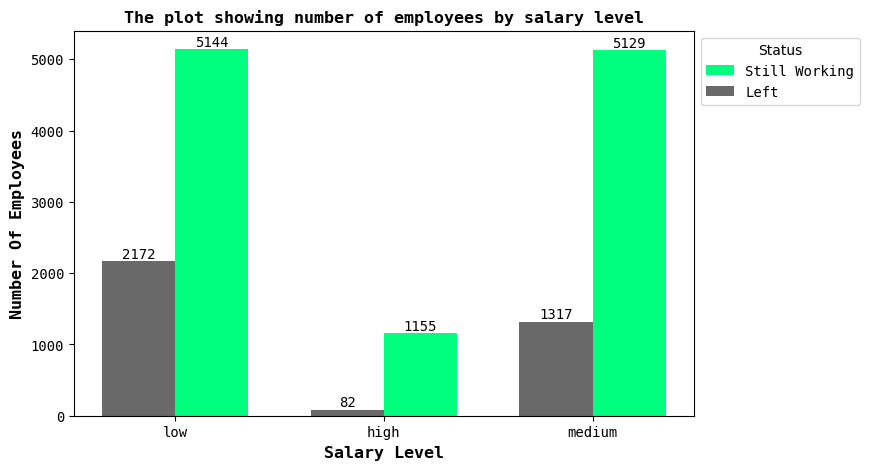

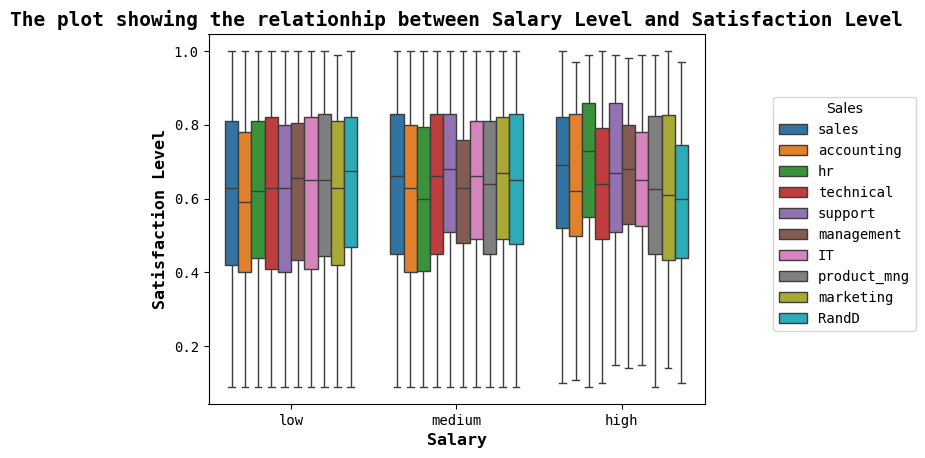

In [65]:
##==========================================================================================================================##
##==========================================================================================================================##


from pyspark.sql import functions as func
import numpy as np
##MATPLOTLIB
### Innovate a Bar Plot Using Matplotlib by Dividing Columns Salary Level into Two Categories is 'Left' or 'Still Working' based on Number of Employees
sal_byleft = df_midterm.groupBy('salary').agg(
    func.sum(func.when(func.col('left') == 1,1).otherwise(0)).alias('left'),
    func.sum(func.when(func.col('left') == 0,1).otherwise(0)).alias('still')).toPandas()

#Create a figure size
plt.figure(figsize=(8,5))

#Create a int array to get a lenght of Salary Level
x = np.arange(len(salary_bar["salary"]))

#Create Width of Columns
width = 0.35

### Divide this plot by left column
bar_still = plt.bar(x + width/2, sal_byleft['still'], width, color ='springgreen', label = 'Still Working')
bar_left = plt.bar(x - width/2, sal_byleft['left'], width, color ='dimgray', label = 'Left')

#Using Loop to get a accurate number of employees
for bar in bar_left:
    plt.text(bar.get_x() + bar.get_width()/2, 
            bar.get_height(), 
            f'{int(bar.get_height())}', 
            ha = 'center',
            va = 'bottom',
            fontfamily = 'monospace')
for bar in bar_still:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f'{int(bar.get_height())}',
             ha = 'center',
             va = 'bottom',
             fontfamily = 'monospace')

#Adding  X - Y Label, Title, show Label and The Plot
plt.xlabel('Salary Level',
            fontweight = 'bold',
            fontsize = 12,
            fontfamily = 'monospace')
plt.yticks(fontfamily = 'monospace')
plt.xticks(x,sal_byleft['salary'],
           fontfamily = 'monospace')

plt.ylabel('Number Of Employees',
            fontweight = 'bold',
            fontsize = 12,
            fontfamily = 'monospace')

plt.title('The plot showing number of employees by salary level',
            fontweight = 'bold',
            fontsize = 12,
            fontfamily = 'monospace')
plt.legend(title="Status", 
           bbox_to_anchor=(1, 1), 
           loc='upper left',
           prop={"family": "monospace"})

plt.show()


# ##==========================================================================================================================##

#SEABORN
# Innovate a Boxplot using Seaborn to compare the distribution of Satisfaction Level by Salary Level based on 'Sales'
data_boxplot =  df_pandas

col_x_boxplot =  df_pandas['salary']

col_y_boxplot = df_pandas['satisfaction_level']

hue_col = df_pandas['sales']

sns_innovate_plot = sns.boxplot(x = col_x_boxplot, y = col_y_boxplot, hue= hue_col)

plt.legend(title="Sales", 
           bbox_to_anchor=(1.125, 0.85), 
           loc='upper left',
           fontsize = 14,
           prop={"family": "monospace"})

plt.title('The plot showing the relationhip between Salary Level and Satisfaction Level',
          fontsize = 14,
          fontweight ='bold',
          fontfamily= 'monospace')
plt.xlabel('Salary',
           fontweight = 'bold',
           fontsize = 12,
           fontfamily = 'monospace')
plt.ylabel('Satisfaction Level',
           fontweight = 'bold',
           fontsize = 12,
           fontfamily = 'monospace')
plt.xticks(fontfamily = 'monospace')
plt.yticks(fontfamily = 'monospace')
plt.show()


##==========================================================================================================================##

#BOKEH

df_pandas["left"] = df_pandas["left"].astype(str)
satis_source = ColumnDataSource(data = df_pandas)
innovate_bokeh = figure(title = 'Scatter Plot Between Satisfaction Level And Last Evaluation',
                            x_axis_label = 'Satisfaction Level',
                            y_axis_label = 'Last Evaluation',
                            width = 800,
                            height = 800)

colors = {"0": "springgreen", "1": "orange"}

for left_value in ['0', '1']:

    filter_value_bokeh = df_pandas[df_pandas['left'] == left_value]
    status_label_bokeh = 'Left' if left_value == '1' else 'Still working' 
    source = ColumnDataSource(filter_value_bokeh)
    innovate_bokeh.scatter('satisfaction_level', 
                               'last_evaluation', 
                               color = colors[left_value],
                               source = source,
                               legend_label = f'{status_label_bokeh}', 
                               alpha = 0.65)


innovate_bokeh.add_layout(innovate_bokeh.legend[0], 'right')
innovate_bokeh.legend.title = "Left Status"
innovate_bokeh.legend.click_policy = "hide"
## Change text font, font size and font style

#Title of plot
innovate_bokeh.title.text_font,innovate_bokeh.title.text_font_size ,innovate_bokeh.title.text_font_style = "courier" ,"14pt","bold"

#X - Axis
innovate_bokeh.xaxis.axis_label_text_font = 'courier'
innovate_bokeh.xaxis.axis_label_text_font_size = '14pt'
innovate_bokeh.xaxis.axis_label_text_font_style = 'bold'

#X - Stick Values
innovate_bokeh.xaxis.major_label_text_font = 'courier'
innovate_bokeh.xaxis.major_label_text_font_size = '12pt'
innovate_bokeh.xaxis.major_label_text_font_style = 'bold'

#Y - Axis
innovate_bokeh.yaxis.axis_label_text_font = 'courier'
innovate_bokeh.yaxis.axis_label_text_font_size = '14pt'
innovate_bokeh.yaxis.axis_label_text_font_style =  'bold'

#Y- Stick Values
innovate_bokeh.yaxis.major_label_text_font = 'courier'
innovate_bokeh.yaxis.major_label_text_font_size = '12pt'
innovate_bokeh.yaxis.major_label_text_font_style = 'bold'

#Legend Values - Legend Title
innovate_bokeh.legend.label_text_font= 'courier'
innovate_bokeh.legend.label_text_font_style = 'bold'
innovate_bokeh.legend.title_text_font = 'courier'
innovate_bokeh.legend.title_text_font_style = 'bold'
#Adding Hover Tool

hover = HoverTool(tooltips = [
    ('salary','@salary'),
    ('left','@left')
])
innovate_bokeh.add_tools(hover)

show(innovate_bokeh)